# Data visulisation for Football season 1955-2023

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/champions-league-dataset-1955-2023/UCL_AllTime_Performance_Table - UCL_Alltime_Performance_Table.csv
/kaggle/input/champions-league-dataset-1955-2023/UCL_Finals_1955-2023 - UCL_Finals_1955-2023.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading the dataset

In [3]:
df_all = pd.read_csv("/kaggle/input/champions-league-dataset-1955-2023/UCL_AllTime_Performance_Table - UCL_Alltime_Performance_Table.csv")
df_history = pd.read_csv("/kaggle/input/champions-league-dataset-1955-2023/UCL_Finals_1955-2023 - UCL_Finals_1955-2023.csv")

display(df_all.info())
display(df_history.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   #       333 non-null    float64
 1   Team    354 non-null    object 
 2   M.      354 non-null    int64  
 3   W       354 non-null    int64  
 4   D       354 non-null    int64  
 5   L       354 non-null    int64  
 6   goals   354 non-null    object 
 7   Dif     354 non-null    int64  
 8   Pt.     354 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 25.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Season       69 non-null     object
 1   Country      69 non-null     object
 2   Winners      69 non-null     object
 3   Score        69 non-null     object
 4   Runners-up   69 non-null     object
 5   Country.1    69 non-null     object
 6   Venue        69 non-null     object
 7   Attend­ance  69 non-null     object
 8   Notes        18 non-null     object
dtypes: object(9)
memory usage: 5.0+ KB


None

In [4]:
display(df_all.head(4))
display(df_history.head(4))

,#,Team,M.,W,D,L,goals,Dif,Pt.
0,1.0,Real Madrid,486,291,85,110,1076:55:00,533,533
1,2.0,Bayern München,388,231,78,79,817:24:00,427,427
2,3.0,FC Barcelona,341,196,77,68,675:51:00,319,319
3,4.0,Manchester United,289,153,69,67,524:56:00,224,224


,Season,Country,Winners,Score,Runners-up,Country.1,Venue,Attend­ance,Notes
0,1955–56,Spain,Real Madrid,4–3,Reims,France,"Parc des Princes, Paris, France","38,239",NaN
1,1956–57,Spain,Real Madrid,2–0,Fiorentina,Italy,"Santiago Bernabéu, Madrid, Spain","124,000",NaN
2,1957–58,Spain,Real Madrid,3–2,Milan,Italy,"Heysel Stadium, Brussels, Belgium","67,000",Match was won during extra time
3,1958–59,Spain,Real Madrid,2–0,Reims,France,"Neckarstadion, Stuttgart, West Germany","72,000",NaN


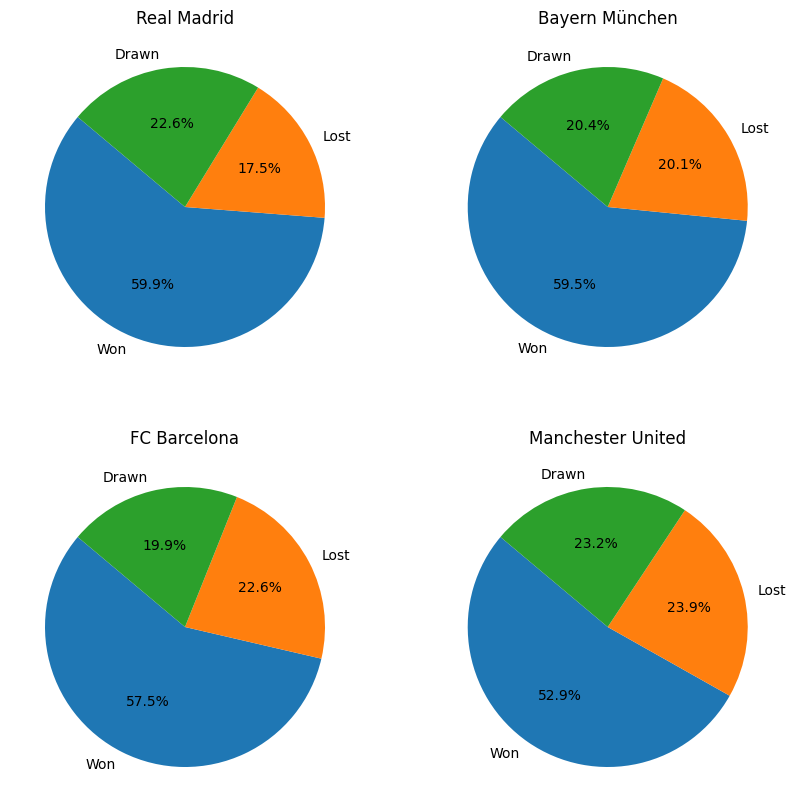

In [5]:
team_name = df_all['Team'].unique()[0:4]
value = []
for i in range(len(team_name)):
    team_data = df_all[df_all['Team']==team_name[i]]
    data = team_data.iloc[0,2:6]
    values = data.values 
    value.append(values)

plt.figure(figsize=[10,10])
for j in range(len(value)):
    plt.subplot(2,2,j+1)
    plt.pie(value[j][1:],labels=['Won', 'Lost', 'Drawn'], autopct='%1.1f%%', startangle=140)
    plt.title(f'{team_name[j]}')

In [6]:
venue = df_history['Venue'].str.split(',')
l = []
for i in range(df_history['Venue'].count()):
    list = venue[i][2]
    l.append(list)
    
df_history['Venue Country'] = l

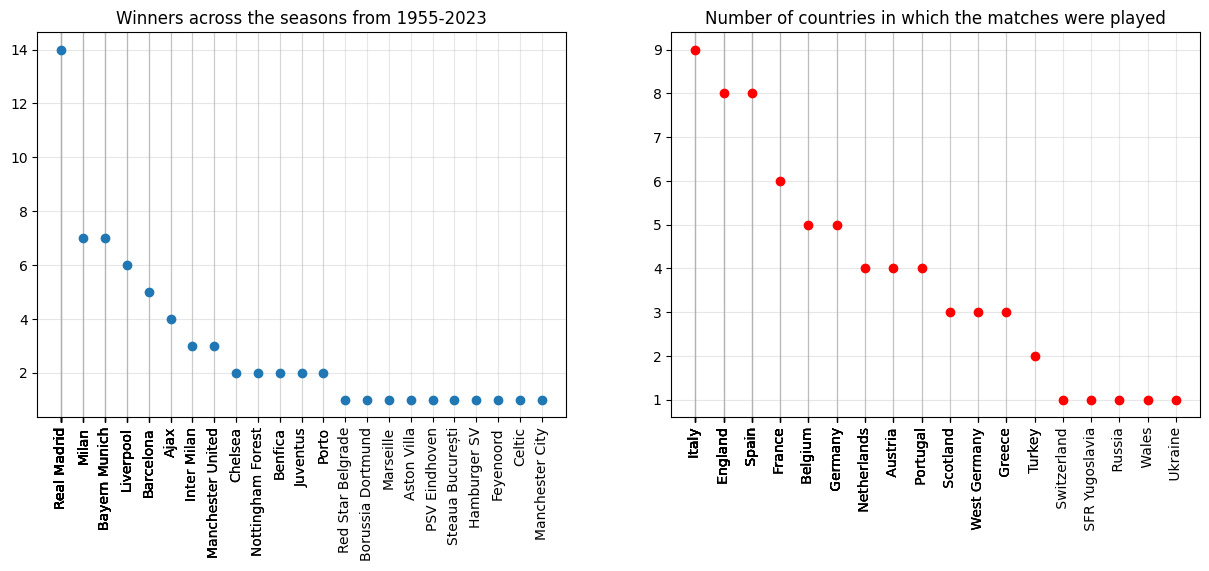

In [7]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.plot(df_history['Winners'].value_counts(),'o')
plt.grid(True,alpha=0.3)
plt.xticks(df_history['Winners'],rotation=90)
plt.title('Winners across the seasons from 1955-2023')

plt.subplot(1,2,2)
plt.plot(df_history['Venue Country'].value_counts(),'o',color='red')
plt.xticks(df_history['Venue Country'],rotation=90)
plt.grid(True,alpha=0.3)
plt.title('Number of countries in which the matches were played');

### Conclusion:
From the above visualisations we can draw the following conclusions:
1. The number of matches played by a team is directly proportional to the number of matches won and lost in the series. The top four teams are shown in the pie chart which shows their four parameters as won, lost and draw. It shows us that the matches drawn and matches won contribute the most. This could predict that Real Madrid could recieve many wins in the next season considering their team stats. 

2. The second chart shows us the winners across the seasons from 1955-2023 as a scatter plot and Real Madrid has the amximum number of wins in the seasons and the venue country that has been played in the most is Italy. This shows us Italy has the most number of football games in the season which could attract potential football fans from the different countries which could boost the italian tourism and generate a revenue for the country. 